In [31]:
import pandas as pd
import numpy as np

In [32]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [33]:
df = pd.read_csv('../../datasets/titanic.csv' , usecols = ['Age' , 'Fare' , 'Survived'])
df.head()
df.dropna(inplace=True)
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [34]:
x = df[['Age' , 'Fare']]
y = df['Survived']
x.head()


,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [35]:
def discretize(bins , strategy) : 
    kbin_age = KBinsDiscretizer(n_bins = bins , encode = 'ordinal' , strategy = strategy)
    kbin_fare = KBinsDiscretizer(n_bins = bins , encode = 'ordinal' , strategy = strategy)

    trf = ColumnTransformer([
        ('first' , kbin_age , [0]) , 
        ('second' , kbin_fare , [1])
    ])

    x_transformed = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier() , x , y , cv = 10 , scoring = 'accuracy')))

    print(np.mean(cross_val_score(DecisionTreeClassifier() , x_transformed , y , cv = 10 , scoring = 'accuracy')))

    plt.figure(figsize = (14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_transformed[: , 0] , color = 'red')
    plt.title("After")
    plt.show()

0.6330790297339594
0.6330594679186229


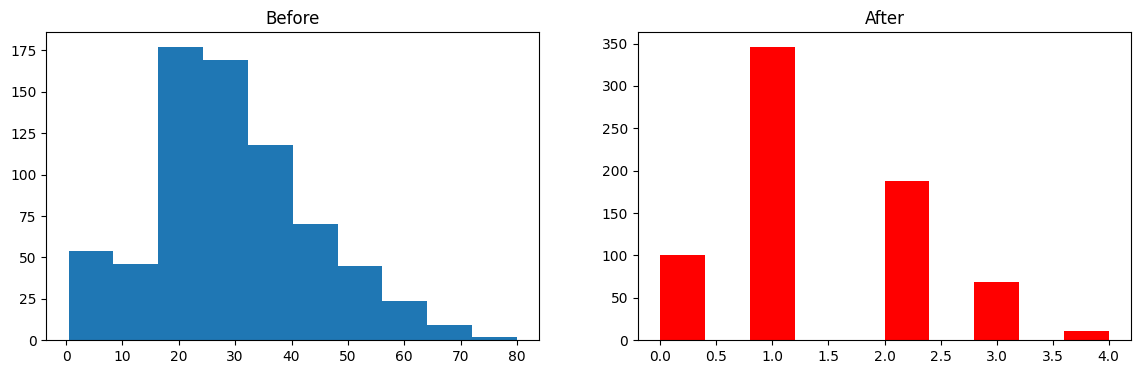

0.6330985915492958
0.673943661971831


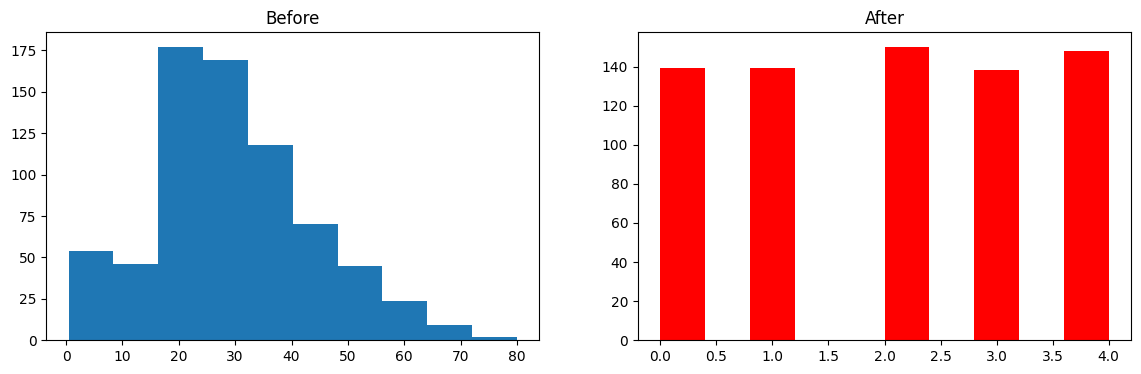

In [36]:
discretize(5 , 'uniform')
discretize(5 , 'quantile')

#Quantile performs better as outliers are handeled and data is uniform 